In [25]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

import geometry
import model
import solvers_TBF as solvers

In [26]:
mesh, BCs = geometry.getArcTruss()
coordinates, connectivity = mesh['coordinates'], mesh['connectivity']

modelA = model.Model()
modelA.mesh.addNodes(coordinates)
modelA.mesh.addConnectivity(connectivity)

modelA.material.setProperties(1, 0)
modelA.section.setProperties(1)

modelA.setBoundaryConditions(BCs)

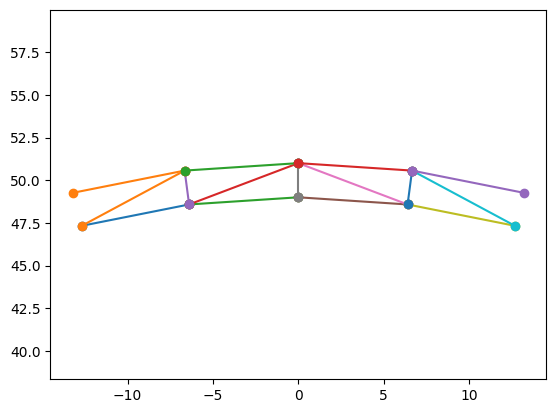

In [27]:
modelA.plotUndeformed()

In [28]:
solver = solvers.Static()

solver.setConstraint('Load')
solver.setTolerance(1e-3)
solver.setMaxIterations(20)
solver.setSolutionAttempts(5)

In [29]:
# Load control
x, c = solver.solve(modelA, 0.0025*np.ones(22))
#x, c = solver.solve(modelA, 0.0025*np.ones(50))

# Displacement control
# x, c = solver.solve(modelA, -0.005*np.ones(275))

# Riks constraint
# x, c = solver.solve(modelA, 0.005*np.ones(250))
# x, c = solver.solve(modelA, 0.045*np.ones(120))

# Arc-length
#x, c = solver.solve(modelA, 0.025*np.ones(450))

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(x, c)

plt.xlabel('Displacement')
plt.ylabel(r'$\lambda$')

In [ ]:
modelA.plotUndeformed()
modelA.plotDeformed(scale=1, alpha=0.25)